#**Project 1: Exploring the Interconnectedness of GDP and Key Socioeconomic Factors**

##Introduction

GDP and life expectancy are important measures of a country’s health and economy. But we can explore deeper and find hidden relationships between these and other affecting variable. This project dives into a data set containing detailed global metrics. By analyzing and visualizing these data points, I aim to explore relationships that show how different factors influence a country’s growth and quality of life.
This data set consists of 204 columns with 38 rows, covering diverse economic and social metrics across countries worldwide. The data set provides an expansive view of global trends with indicators such as education enrollment, unemployment, homicide rates, CO₂ emissions, and tourism statistics. In this analysis, I will visualize how different indicators relate to one another to find insights into their interactions.

##Key features of the data set
GDP: Gross Domestic Product (in current US dollars), representing the total economic output of a country.

Sex Ratio: The ratio of males to females in the population, highlighting demographic trends.

Life Expectancy: Average lifespan for males and females, an essential indicator of healthcare quality.

Education Enrollment Rates: Data on primary, secondary, and post-secondary education enrollment for males and females, reflecting educational attainment.

Unemployment Rate: Percentage of the labor force that is unemployed, indicating economic health.

Homicide Rate: Number of homicides per 100,000 population, providing insight into safety and crime levels.

Urban Population Growth: Rate of growth in urban populations, illustrating migration trends.

CO2 Emissions: Carbon dioxide emissions per capita, an important measure of environmental impact.

Forested Area: Percentage of land covered by forests, indicating biodiversity and environmental health.

Tourist Numbers: Total number of international visitors, which can reflect a country's tourism potential.

##Exploratory data analysis (EDA)

###1. Import Libraries and Load the Dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Raw URL of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/pherathm/gdp_data/main/country_data.csv'

# Since the data set was not readble;
#Read the CSV file into a Pandas data frame with a specified encoding
df = pd.read_csv(url, encoding='ISO-8859-1')  # Use 'ISO-8859-1' or 'latin1'

# Display the first few rows of the data frame
print(df.head())




        gdp  sex_ratio  surface_area  life_expectancy_male  unemployment  \
0   20514.0      105.4      652864.0                  62.8          11.2   
1   15059.0      103.7       28748.0                  76.7          12.8   
2  173757.0      102.1     2381741.0                  75.4          11.5   
3    3238.0      102.3         468.0                   NaN           NaN   
4  105902.0       97.9     1246700.0                  57.8           6.8   

   imports  homicide_rate                                   currency iso2  \
0   8370.0            6.7         {'code': 'AFN', 'name': 'Afghani'}   AF   
1   5908.0            2.3             {'code': 'ALL', 'name': 'Lek'}   AL   
2  45140.0            1.4  {'code': 'DZD', 'name': 'Algerian Dinar'}   DZ   
3   1538.0            0.0            {'code': 'EUR', 'name': 'Euro'}   AD   
4  21340.0            4.8          {'code': 'AOA', 'name': 'Kwanza'}   AO   

   employment_services  ...  pop_growth           region  pop_density  \
0      

###2. Data Cleaning

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print( missing_values)

gdp                                    1
sex_ratio                              0
surface_area                           1
life_expectancy_male                   6
unemployment                          10
imports                                5
homicide_rate                         23
currency                               0
iso2                                   1
employment_services                   11
employment_industry                   11
urban_population_growth                0
secondary_school_enrollment_female    14
employment_agriculture                11
capital                                0
forested_area                          4
exports                                5
life_expectancy_female                 6
post_secondary_enrollment_female      33
post_secondary_enrollment_male        33
primary_school_enrollment_female       8
infant_mortality                       8
gdp_growth                             1
threatened_species                     0
population      

In [ ]:
#drop missing values
data_cleaned = df.dropna()

# Check for missing values after dropping
missing_values_after = data_cleaned.isnull().sum()
print(missing_values_after)


gdp                                   0
sex_ratio                             0
surface_area                          0
life_expectancy_male                  0
unemployment                          0
imports                               0
homicide_rate                         0
currency                              0
iso2                                  0
employment_services                   0
employment_industry                   0
urban_population_growth               0
secondary_school_enrollment_female    0
employment_agriculture                0
capital                               0
forested_area                         0
exports                               0
life_expectancy_female                0
post_secondary_enrollment_female      0
post_secondary_enrollment_male        0
primary_school_enrollment_female      0
infant_mortality                      0
gdp_growth                            0
threatened_species                    0
population                            0


In [ ]:
# # Display the head of cleaned data
print(data_cleaned.head())

        gdp  sex_ratio  surface_area  life_expectancy_male  unemployment  \
1   15059.0      103.7       28748.0                  76.7          12.8   
2  173757.0      102.1     2381741.0                  75.4          11.5   
4  105902.0       97.9     1246700.0                  57.8           6.8   
6  518475.0       95.3     2780400.0                  73.0          10.4   
7   12433.0       88.8       29743.0                  71.1          16.6   

   imports  homicide_rate                                   currency iso2  \
1   5908.0            2.3             {'code': 'ALL', 'name': 'Lek'}   AL   
2  45140.0            1.4  {'code': 'DZD', 'name': 'Algerian Dinar'}   DZ   
4  21340.0            4.8          {'code': 'AOA', 'name': 'Kwanza'}   AO   
6  49125.0            5.3  {'code': 'ARS', 'name': 'Argentine Peso'}   AR   
7   5053.0            1.7   {'code': 'AMD', 'name': 'Armenian Dram'}   AM   

   employment_services  ...  pop_growth           region  pop_density  \
1      

###Data Profiling

In [ ]:
# 1. Understanding Data Types
data_types = data_cleaned.dtypes
print(data_types)






gdp                                   float64
sex_ratio                             float64
surface_area                          float64
life_expectancy_male                  float64
unemployment                          float64
imports                               float64
homicide_rate                         float64
currency                               object
iso2                                   object
employment_services                   float64
employment_industry                   float64
urban_population_growth               float64
secondary_school_enrollment_female    float64
employment_agriculture                float64
capital                                object
forested_area                         float64
exports                               float64
life_expectancy_female                float64
post_secondary_enrollment_female      float64
post_secondary_enrollment_male        float64
primary_school_enrollment_female      float64
infant_mortality                  

In [ ]:
# 2. Summary Statistics
summary_statistics = data_cleaned.describe(include='all')
print(summary_statistics)



                 gdp   sex_ratio  surface_area  life_expectancy_male  \
count   1.210000e+02  121.000000  1.210000e+02            121.000000   
unique           NaN         NaN           NaN                   NaN   
top              NaN         NaN           NaN                   NaN   
freq             NaN         NaN           NaN                   NaN   
mean    6.810738e+05  101.552066  1.051827e+06             72.363636   
std     2.294058e+06   23.192937  2.453332e+06              6.413787   
min     5.507000e+03   84.500000  3.150000e+02             53.300000   
25%     3.787600e+04   95.300000  6.561000e+04             68.400000   
50%     1.059560e+05   98.500000  2.383910e+05             73.300000   
75%     3.826740e+05  100.600000  7.960950e+05             77.400000   
max     2.058022e+07  302.400000  1.709825e+07             81.600000   

        unemployment       imports  homicide_rate  \
count     121.000000  1.210000e+02     121.000000   
unique           NaN         

###Data Visualization

#### 1. Histogram for **GDP**

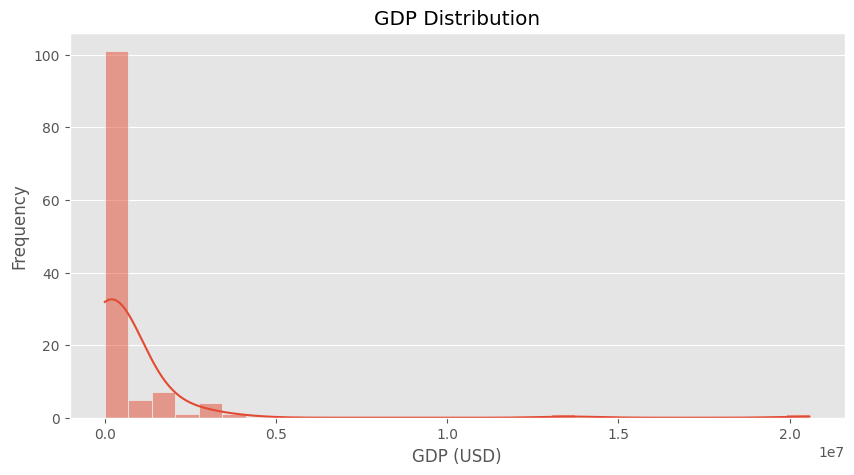

In [ ]:


#use ggplot
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
#histogram for the plot
sns.histplot(data_cleaned['gdp'], bins=30, kde=True)

# Titles and labels
plt.title('GDP Distribution')
plt.xlabel('GDP (USD)')
plt.ylabel('Frequency')

plt.grid(axis='x')
plt.show()

The right-skewed histogram for GDP shows that most countries in the dataset have low to moderate GDPs, meaning they are mostly developing countries facing challenges like limited resources and high poverty rates. In contrast, a few countries, like the United States and China, have very high GDPs, which raises the average GDP. It highlights the global economic inequality.

### 2. Scatter Plot for GDP vs Life Expectancy for male and female

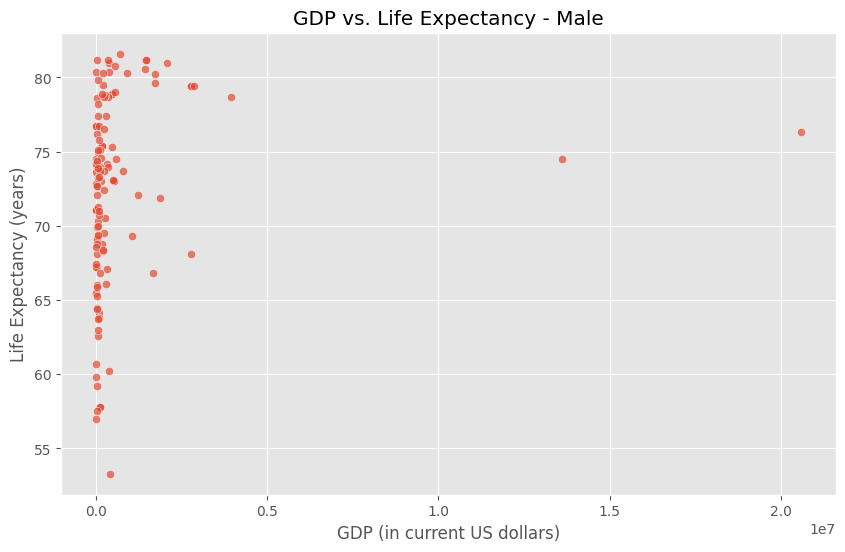

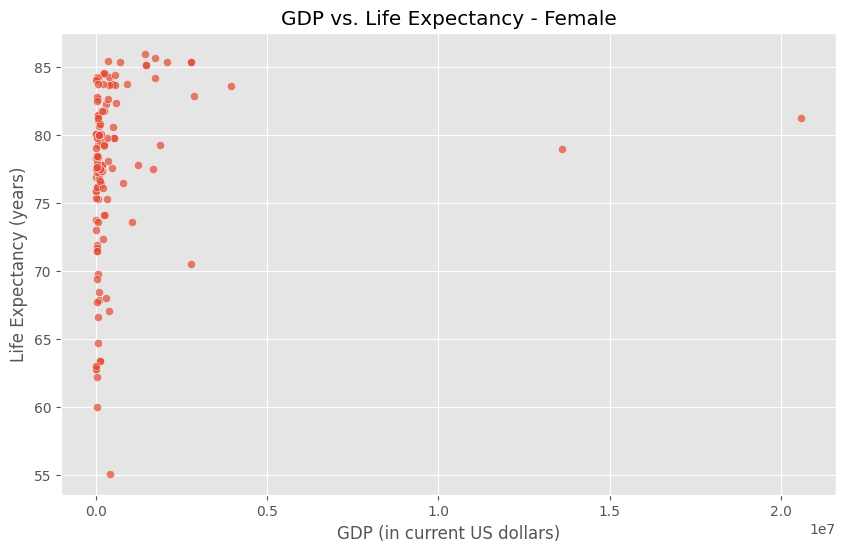

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp', y='life_expectancy_male', data=data_cleaned, alpha=0.7)
plt.title('GDP vs. Life Expectancy - Male')
plt.xlabel('GDP (in current US dollars)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp', y='life_expectancy_female', data=data_cleaned, alpha=0.7)
plt.title('GDP vs. Life Expectancy - Female')
plt.xlabel('GDP (in current US dollars)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()




The scatter plot of GDP and both male and female life expectancy shows that most countries are grouped on the left side, which means they have low GDPs and may be facing economic difficulties. This can lead to lower life expectancy rates. A few countries on the right side have much higher GDPs and tend to have better healthcare and living standards, resulting in longer life expectancies. Overall, while there is a trend showing that higher GDP usually means better life expectancy, the clustering of countries on the left highlights the economic challenges many face and emphasizes the need for economic growth to improve healthcare and life quality.

### 3. Sex Ratio Distribution

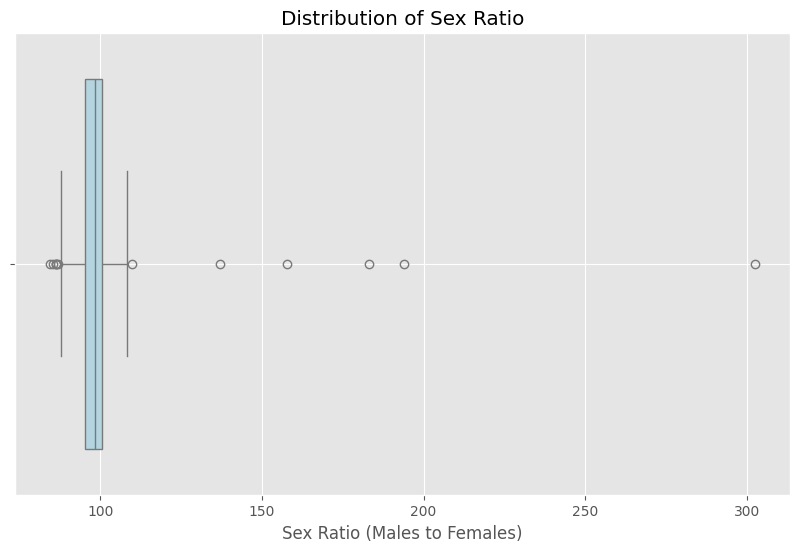

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex_ratio', data=data_cleaned, color='lightblue')
plt.title('Distribution of Sex Ratio')
plt.xlabel('Sex Ratio (Males to Females)')
plt.grid('True')
plt.show()



A right-skewed box-plot indicates that there are usually more females than males or a balanced ratio in many populations. Many sex ratios might be around 90 males for every 100 females, showing a female-heavy population.

### 4. Unemployment Rate

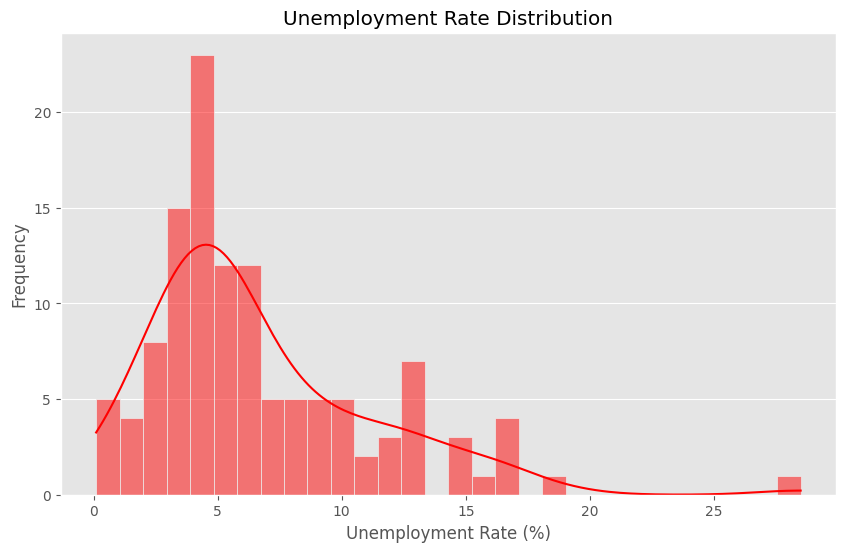

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['unemployment'], bins=30, kde=True, color='red')
plt.title('Unemployment Rate Distribution')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='x')
plt.show()

The histogram shows that most countries have low unemployment rates, with many clustering around 4%. This indicates that many countries experience stable job markets. However, there are also outliers with much higher unemployment rates, suggesting economic difficulties in those specific areas.

### 5. Homicide Rate vs Urban Population Growth


<ipython-input-73-621ac18c47cd>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='homicide_rate', y='urban_population_growth', data=data_cleaned, palette='viridis', alpha=0.7, color='blue')


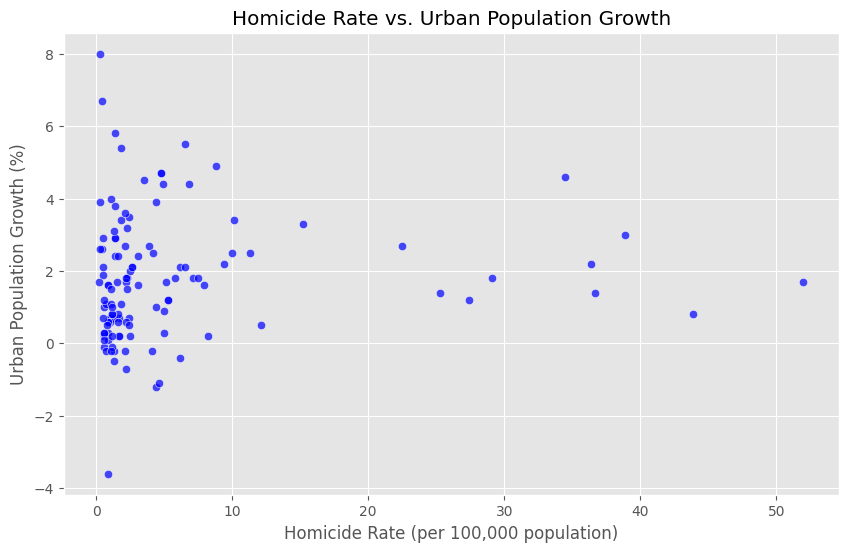

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='homicide_rate', y='urban_population_growth', data=data_cleaned, palette='viridis', alpha=0.7, color='blue')
plt.title('Homicide Rate vs. Urban Population Growth')
plt.xlabel('Homicide Rate (per 100,000 population)')
plt.ylabel('Urban Population Growth (%)')
plt.grid(True)
plt.show()

The scatter plot of homicide rates versus urban population growth indicates a positive correlation, with most countries exhibiting low homicide rates and corresponding urban growth. This suggests that safer environments are linked to healthier urban development. On the right side, however, where homicide rates are higher, there seems to be little to no clear relationship with urban population growth. This implies that in regions with increased violence, the urban growth rates vary widely and do not follow a consistent trend.

### # 6. CO2 Emissions vs GDP


<ipython-input-76-fde6b6df64a1>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='gdp', y='co2_emissions', data=data_cleaned, palette='viridis', alpha=0.7)


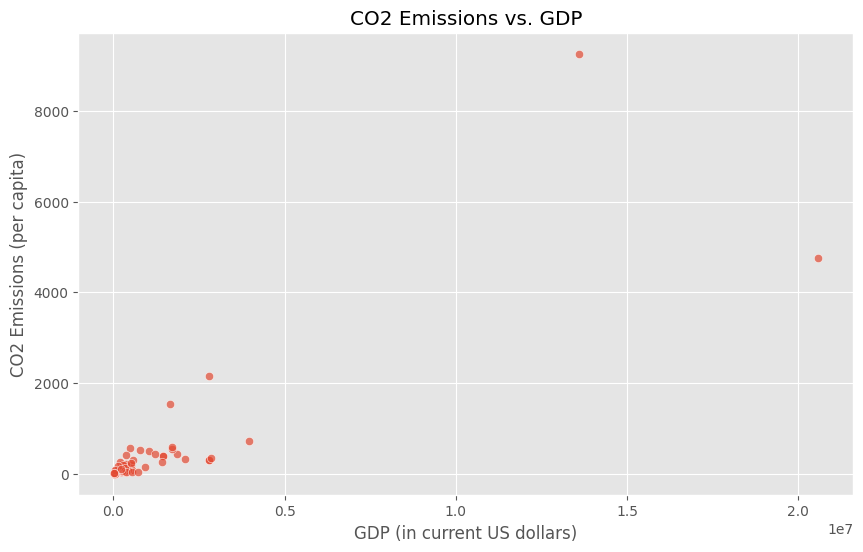

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp', y='co2_emissions', data=data_cleaned, palette='viridis', alpha=0.7)
plt.title('CO2 Emissions vs. GDP')
plt.xlabel('GDP (in current US dollars)')
plt.ylabel('CO2 Emissions (per capita)')
plt.grid(True)
plt.show()

The scatter plot of CO2 emissions versus GDP shows a positive correlation, meaning that higher GDP generally corresponds to higher per capita CO2 emissions. This suggests that wealthier countries tend to have more economic activity, leading to increased emissions. However, some outliers indicate countries with high CO2 emissions relative to their GDP, possibly due to factors like heavy fossil fuel use or specific industrial practices. Overall, while there is a trend linking economic growth to emissions, these outliers point to the influence of other factors on CO2 emissions.

### 7. Forested Area


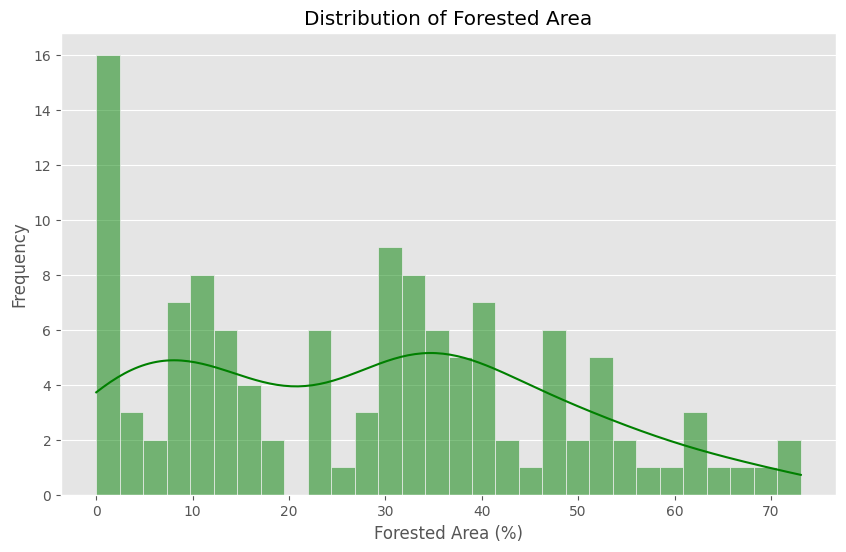

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['forested_area'], bins=30, kde=True, color = 'green')
plt.title('Distribution of Forested Area')
plt.xlabel('Forested Area (%)')
plt.ylabel('Frequency')
plt.grid(axis='x')
plt.show()

The histogram of forested area displays two bell-shaped curves, indicating two distinct groups of countries regarding forest cover. Most countries have low forested areas, likely due to urbanization, agriculture, or deforestation, while fewer countries show higher percentages of forest cover.

### 8. Tourist Numbers


<Figure size 1000x600 with 0 Axes>

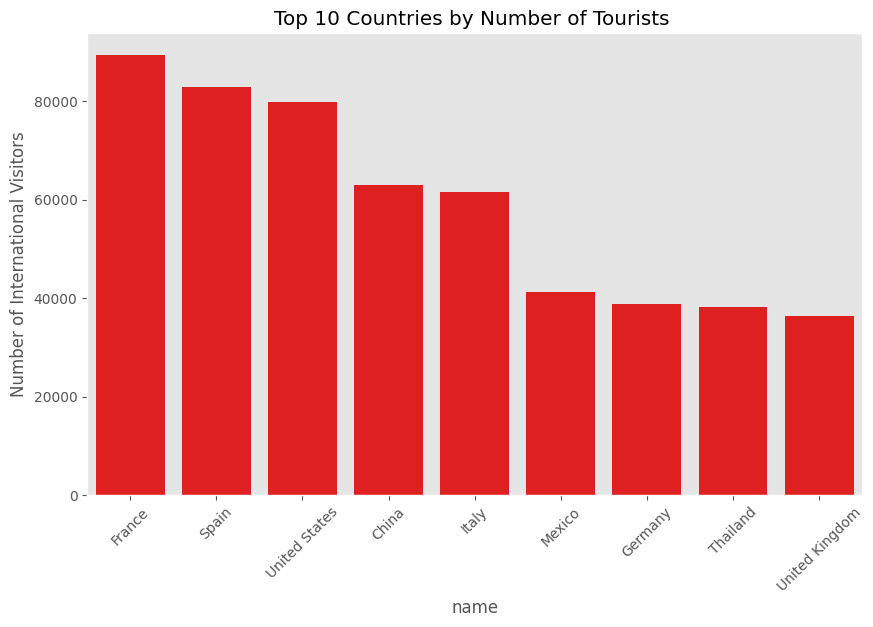

In [ ]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='tourists', data=data_cleaned.sort_values('tourists', ascending=False).head(10), color = 'red')
plt.title('Top 10 Countries by Number of Tourists ')
plt.xticks(rotation=45)
plt.ylabel('Number of International Visitors')
plt.grid(axis='y')
plt.show()

The bar plot displaying the top 10 countries by the number of international tourists reveals that France, Spain, the United States lead in most attracting visitors.

### 9. Pair plot

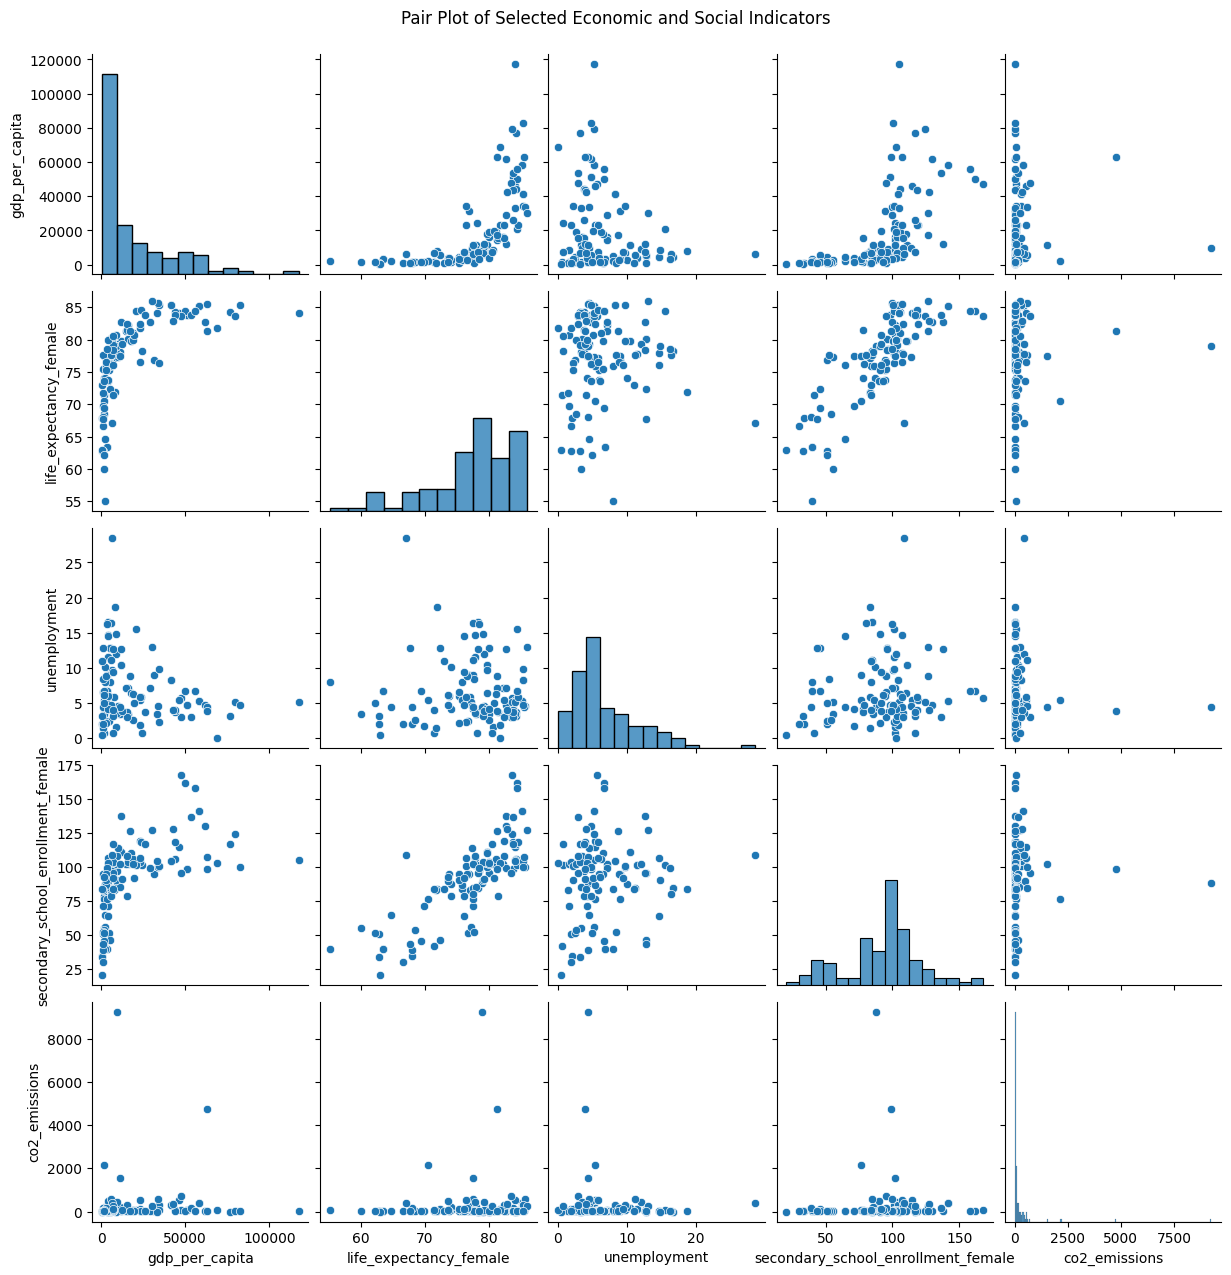

In [ ]:
# Select suitable variables for the pair plot
variables = ['gdp_per_capita', 'life_expectancy_female', 'unemployment', 'secondary_school_enrollment_female', 'co2_emissions']

# Create a pair plot using the selected variables
pair_plot = sns.pairplot(data_cleaned, vars=variables)

#title
pair_plot.fig.suptitle("Pair Plot of Selected Economic and Social Indicators", y=1.02)

plt.show()


The pair plot shows several relationships between economic and social factors. Countries with higher GDP per capita tend to have longer life expectancy for women and higher rates of girls in secondary school. This likely means that richer countries have better healthcare, living conditions, and education. There is also a slight link between high GDP and high CO2 emissions, which may be due to more industry and energy use. Unemployment doesn’t seem to affect life expectancy for women in a clear way. However, there is a positive link between girls’ school enrollment and life expectancy. It suggests that countries where more girls go to school also provide better healthcare.

### 10. Correlation Heat Map

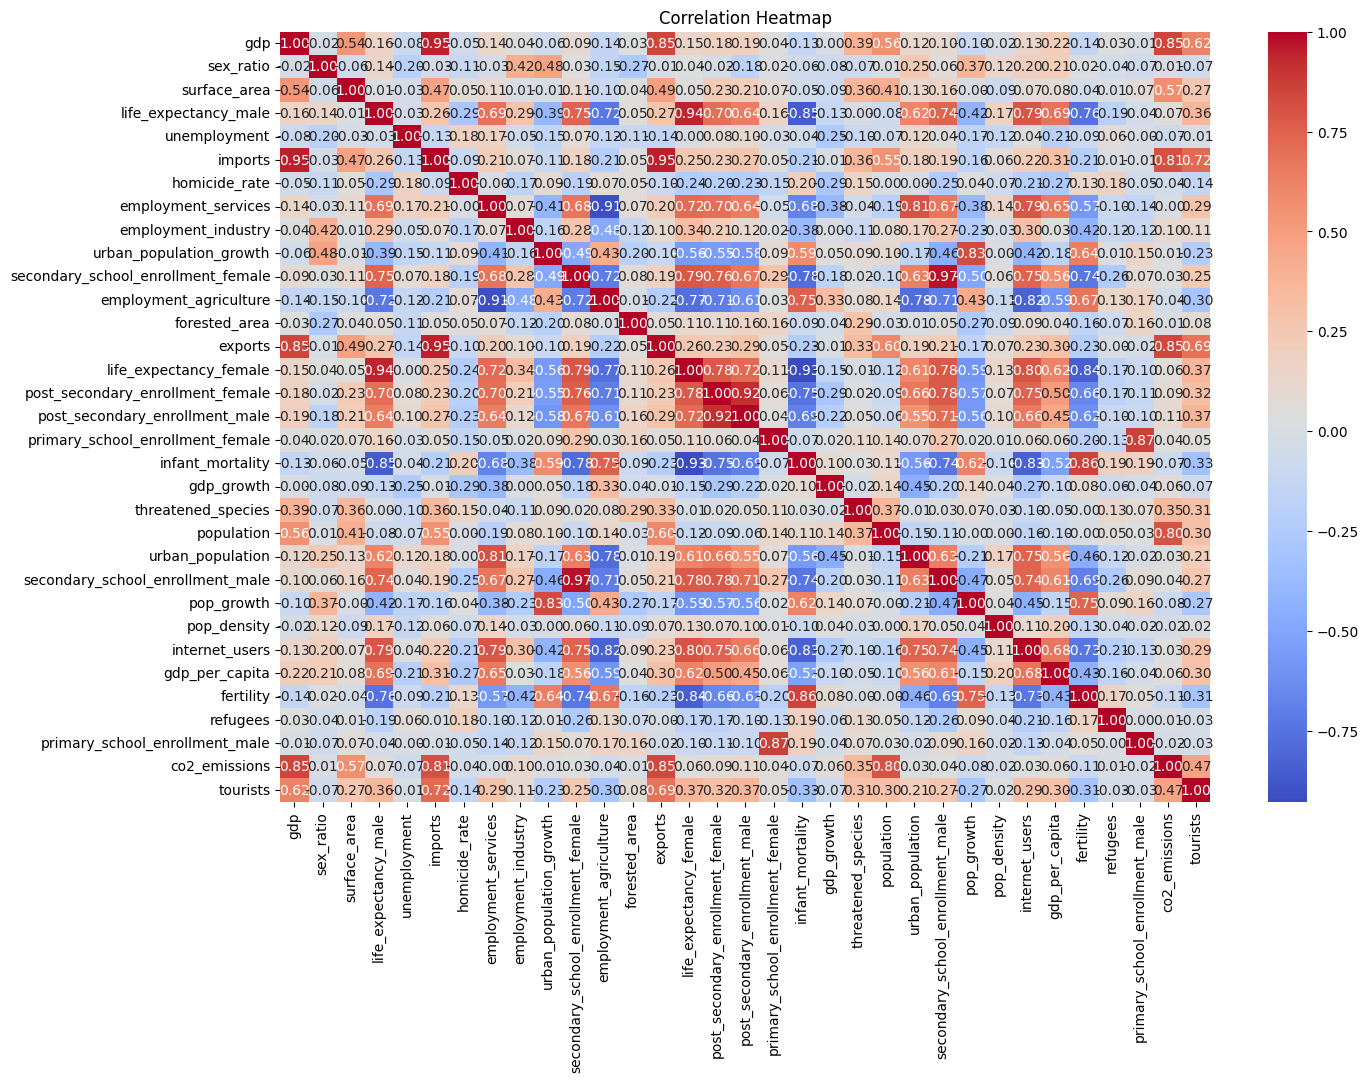

In [ ]:
numeric_df = data_cleaned.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###11. Violin Plot for GDP by Region

<ipython-input-93-51e28c35f369>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_cleaned, x="region", y="gdp", inner="quartile", palette="muted")


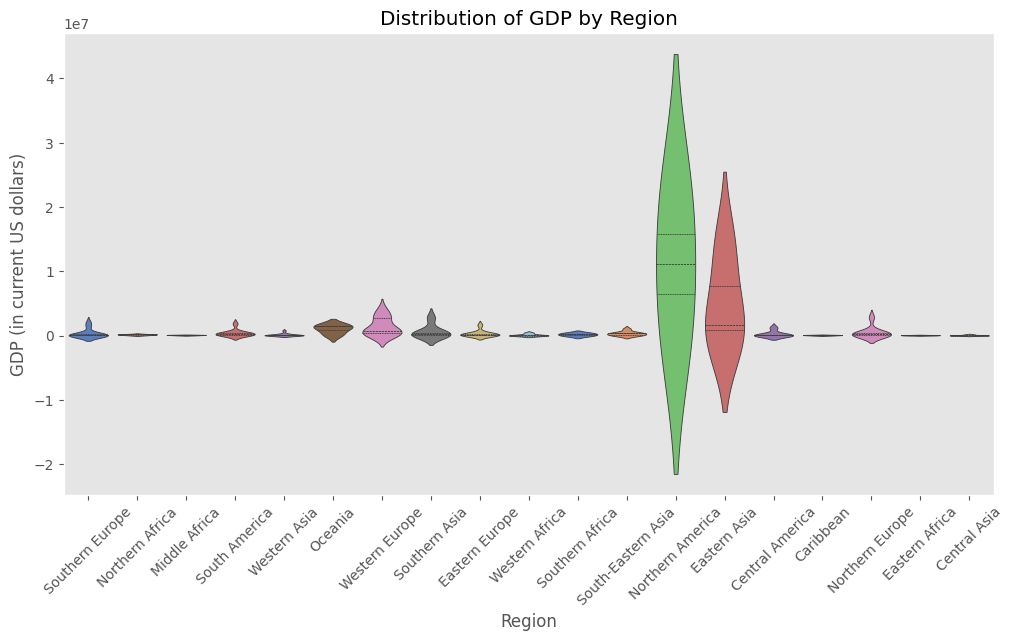

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.violinplot(data=data_cleaned, x="region", y="gdp", inner="quartile", palette="muted")

# Add title and labels
plt.title("Distribution of GDP by Region")
plt.xlabel("Region")
plt.ylabel("GDP (in current US dollars)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines to the y-axis

# Show the plot
plt.show()

Each region's distribution can be observed through the width of the violin shapes. Wider sections indicate a higher density of countries within that GDP range. South Estern Asia and Northern America show a notable range in GDP values, with a wider spread indicating significant variation between countries. This suggests that while some countries in the region may experience lower GDP (potentially negative or near-zero), others may have higher GDP figures. This variation represents the economic disparities within the region, highlighting both challenges and opportunities across different countries.


#Conclusion

This analysis of global data shows how different factors like GDP, employment, education, safety, and the environment are connected. It helps us see the challenges and opportunities that countries face. Followings are the conclusions obtained from the analysis of GDP data.

**GDP and Life Expectancy**: The scatter plot illustrates a general trend where higher GDP correlates with increased life expectancy, particularly in wealthier nations. However, the clustering of many developing countries with lower GDPs and life expectancy rates underscores the urgent need for economic development initiatives that prioritize healthcare improvements to enhance overall quality of life.

**Sex Ratio Distribution**: The right-skewed distribution indicates a predominance of females in many populations, suggesting demographic trends that may influence economic and social policies. Understanding these trends can help in formulating gender-sensitive policies that aim to address disparities.

**Unemployment Rate Stability**: The low unemployment rates observed for most countries suggest relative economic stability; however, the presence of outliers with high unemployment rates signals ongoing economic challenges that require targeted interventions to foster job creation and stability.

**Safety and Urban Growth**: The positive correlation between low homicide rates and urban population growth highlights the importance of safety in fostering healthy urban development. Policymakers should prioritize public safety initiatives to create environments conducive to urbanization and economic growth.

**Economic Activity and CO2 Emissions**: The relationship between GDP and CO2 emissions reflects the environmental impact of economic growth. While wealthier nations tend to produce higher emissions, some outlier countries challenge this trend, suggesting the need for sustainable practices that decouple economic growth from environmental degradation.

**Forested Area and Urbanization**: The distinct groups observed in the forested area histogram indicate varying approaches to land use, where urbanization and agricultural practices often encroach on forested land. This calls for sustainable land management practices that balance development with environmental preservation.

**Tourism as an Economic Driver**: The data on international tourist numbers highlights the significant role of tourism in economic development for certain countries. Strategies to enhance tourism infrastructure and marketing could further boost these countries’ economies.

**Pair Plot**: The pair plot reveals that countries with higher GDP per capita generally see longer life expectancy for women and higher rates of girls in secondary school, likely due to better healthcare, living standards, and education. While unemployment doesn’t clearly impact women’s life expectancy, there is a positive link between girls' school enrollment and life expectancy, suggesting that better access to education aligns with improved healthcare access.

**Regional Economic Disparities**: The violin plot for GDP by region reveals considerable variation within regions, especially in Southeast Asia and Northern America. This means that economic policies should be adapted to each region’s unique challenges and strengths to support fair and balanced growth.

# Recommendations and Future Research

Given these findings, it is recommended that policymakers prioritize comprehensive economic strategies that address not only GDP growth but also healthcare, education, and environmental sustainability. Further research could explore;

*The impact of specific policies on improving life expectancy in lower-GDP countries.

*The role of education in mitigating unemployment and enhancing economic resilience.
